<a href="https://colab.research.google.com/github/Datbwoyyy/Egbo-Victor/blob/main/Titanic%20Crash%20Survival%20Rate%20Prediction%20Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [15]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

titanic_path = kagglehub.competition_download('titanic')

print('Data source import complete.')


Data source import complete.


In [16]:
print ("Hello world-travellers")

Hello world-travellers


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

# Predicting which Passenger Survived the Crash
This model involves using various machine learning models in predicting which passengers survived the Titanic shipwreck
We are working a series of dataset to predict the outcome of the titanic events given different steps, checkout the dataset here                             
https://www.kaggle.com/competitions/titanic/rules

## 1. Problem Definition
>Given the parameters such as passengers data can we predict who survived the crash.

## 2. Data
The Original data came from Kaggle machine learning competion
https://www.kaggle.com/competitions/titanic/data

## 3.Evaluation
If this can reach 95% accuracy at predicting who will survive the titanic shipwreck,then we will pursue the project.

## 4. Features
This is where you will get different information about each of the data
*Create a data dictionary*

 **Variable	 Definition	 Key**
1. survival	 Survival	0 = No, 1 = Yes
2. pclass	 Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
3. sex	      Sex
4. Age	     Age in years
5. sibsp	 # of siblings / spouses aboard the Titanic
6. parch	 # of parents / children aboard the Titanic
7. ticket	 Ticket number
8. fare	      Passenger fare
9. cabin     Cabin number
10. embarked  Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Preparing the tools
We're going to use pandas, numpy matplotlib for data analysis and manipulation tho this has already been imported.

In [18]:
# Import all the tools

#Regular EDA and Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

# we want our plot to appear inside the model

#models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve



In [19]:
df =pd.read_csv("/content/train (1).csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
df.shape #(rows, columns)

(891, 12)

## Data exploration (exploratory data analysis or EDA)

The goal here is to discover more about the subject matter and become a subject matter expert on the dataset you're working on.

1. What questions(s) am I trying to solve?
2. What kind of data do I have and how do I treat different types?
3. What's missing from the data and how do you deal with it?
4. What are the outliers and why you should deal with them?
5. How can you add or remove features to get more out of the data?

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
# Let's find out how many classes are there
df ["Survived"].value_counts()

,count
Survived,
0,549
1,342


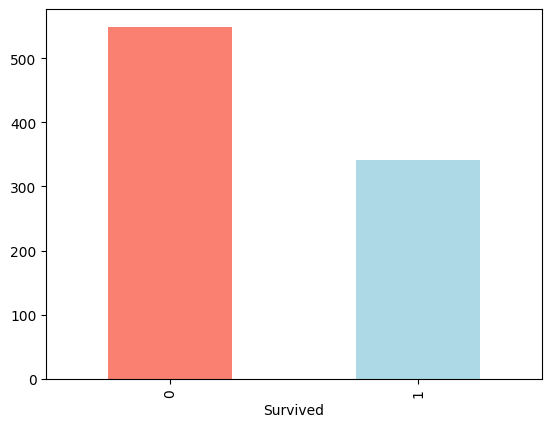

In [24]:
df["Survived"].value_counts().plot(kind="bar", color=[ "salmon", "lightblue"]);

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
import sys
!{sys.executable} -m pip install seaborn

In [27]:
%pip install seaborn

In [28]:
import seaborn as sns

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#Checking for missing values
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 ## Survival Rate according to age

In [32]:
df.Sex.value_counts()

,count
Sex,
male,577
female,314


## Comparing Survival Column to Sex column

In [33]:
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


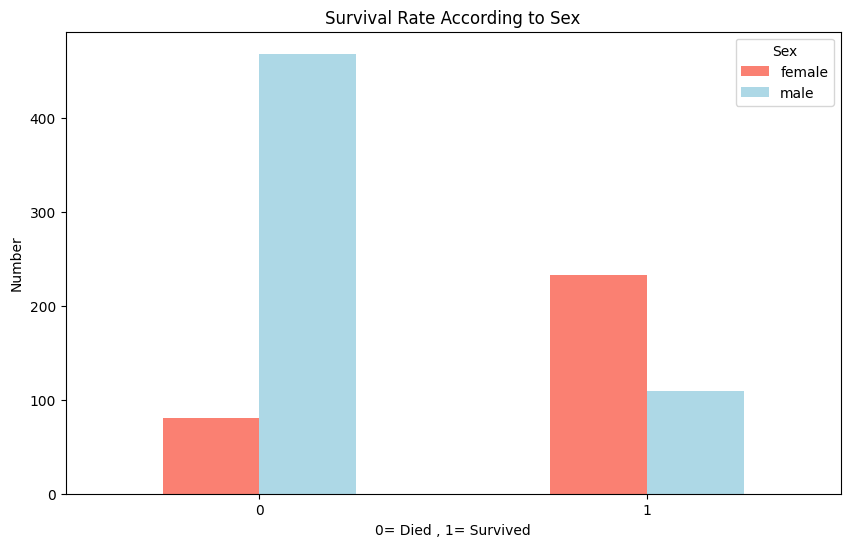

In [34]:
#Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

ax= pd.crosstab(df.Survived, df.Sex).plot(kind="bar",
                                     figsize =(10,6),
                            color=["Salmon","lightblue"])

# Use the plt.title function to set the title of the plot.
ax.set_title("Survival Rate According to Sex") # Use plt.title() to set the title
ax.set_ylabel("Number") # Use ax.set_ylabel() to set the ylabel for the axes object
ax.set_xlabel("0= Died , 1= Survived") # Use ax.set_xlabel to set the xlabel for the axes object
plt.xticks(rotation=0);

# Check if 'title' has been overwritten
if not callable(plt.title):
  print("Warning: 'plt.title' has been overwritten. Restart your kernel to fix this.")

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df["Age"].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
30.00,25
19.00,25
...,...
66.00,1
0.92,1
23.50,1


In [37]:
## Comparing the Age column to Survival

pd.crosstab(df.Survived, df.Age)

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


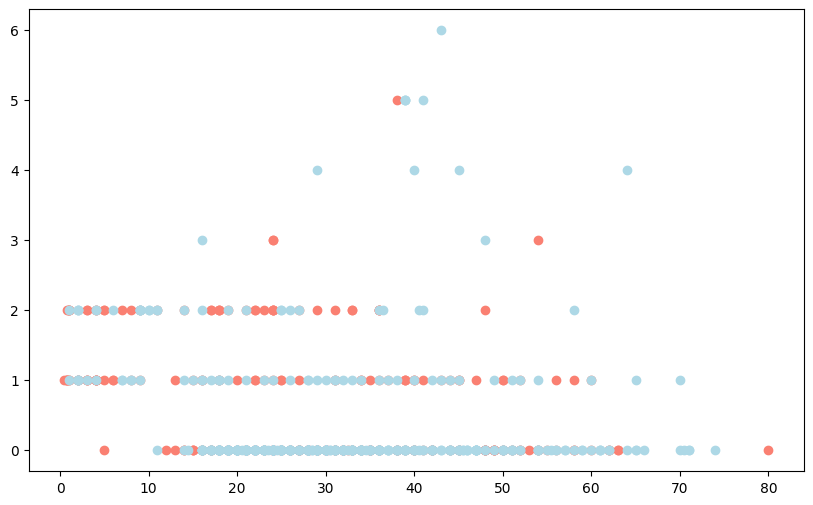

In [38]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.Age[df.Survived==1],
           df.Parch[df.Survived==1],
           c= "salmon"),
# Scatter with Negative examples
plt.scatter(df.Age[df.Survived==0],
           df.Parch[df.Survived==0],
           c= "lightblue");

# Adding some helpful info
plt.title=("Survival rate in function of Age and Children Onboard the titanic")
plt.xlabel=("Age")
plt.ylabel=("Children onboard the titanic")
plt.legend=(["Survived","Died"]);

In [39]:
(df.Age[df.Survived==1])

,Age
1,38.0
2,26.0
3,35.0
8,27.0
9,14.0
...,...
875,15.0
879,56.0
880,25.0
887,19.0


<Axes: ylabel='Frequency'>

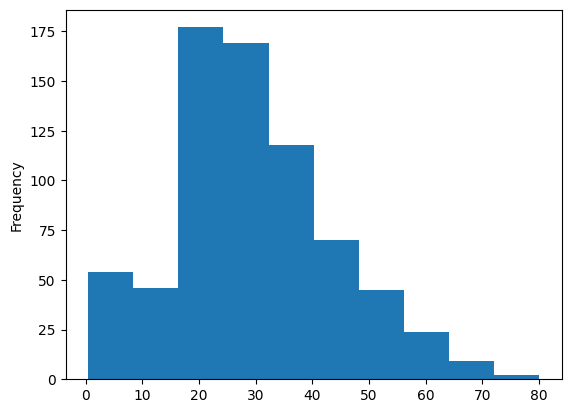

In [40]:
# check the distribution of the age column with a histogram
df.Age.plot.hist()

We can Infer the this is a close to perfect distribution.

Lets make the cross tab more visual

In [41]:
pd.crosstab(df.Parch, df.Survived)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


### Make the crosstab more visual

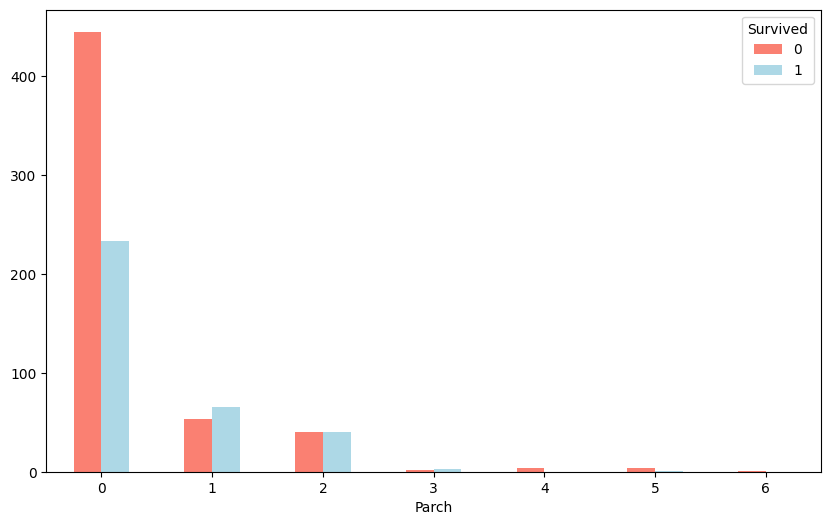

In [42]:
pd.crosstab(df.Parch, df.Survived).plot(kind="bar",
                                        figsize=(10,6),
                                        color=["salmon","lightblue"])
#Adding some communication
plt.title=("Comparing the children on board to the Survival rate")
plt.xlabel=("Children on board")
plt.ylabel=("Survived")
plt.legend=(["Died", "Survived"])
plt.xticks(rotation=0);

In [43]:
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

In [44]:
# Making correlation matrix
df.corr(numeric_only = True)
df.Sex = df.Sex.factorize()[0].astype(float)
df.Name = df.Name.factorize()[0].astype(float)
df.Cabin = df.Cabin.factorize()[0].astype(float)
df.Embarked = df.Embarked.factorize()[0].astype(float)

In [45]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,float64
Sex,float64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [46]:
df.Name.head()

,Name
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


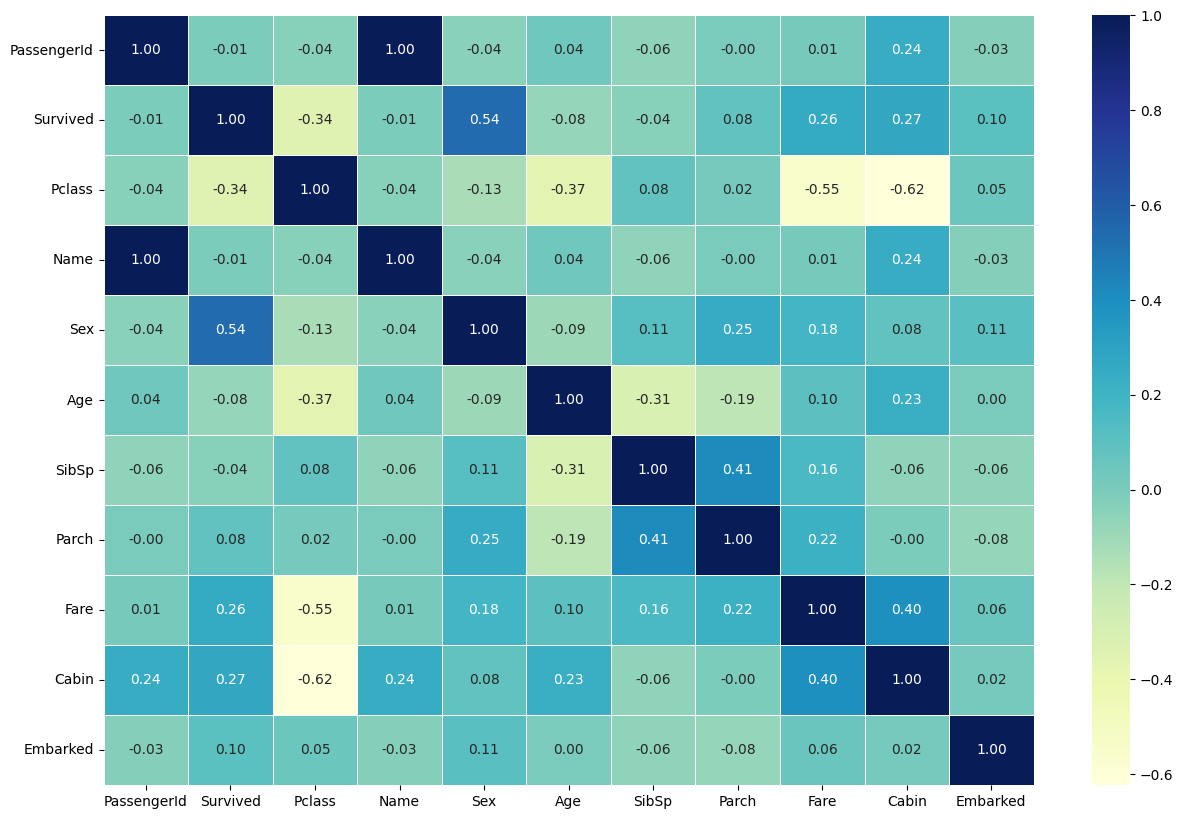

In [47]:
# let's make our correlation matrix a little prettier
corr_matrix= df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [48]:
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass   Name  Sex   Age  SibSp  Parch  \
0              1         0       3    0.0  0.0  22.0      1      0   
1              2         1       1    1.0  1.0  38.0      1      0   
2              3         1       3    2.0  1.0  26.0      0      0   
3              4         1       1    3.0  1.0  35.0      1      0   
4              5         0       3    4.0  0.0  35.0      0      0   
..           ...       ...     ...    ...  ...   ...    ...    ...   
886          887         0       2  886.0  0.0  27.0      0      0   
887          888         1       1  887.0  1.0  19.0      0      0   
888          889         0       3  888.0  1.0   NaN      1      2   
889          890         1       1  889.0  0.0  26.0      0      0   
890          891         0       3  890.0  0.0  32.0      0      0   

               Ticket     Fare  Cabin  Embarked  
0           A/5 21171   7.2500   -1.0       0.0  
1            PC 17599  71.2833    0.0       1.0  
2    STON/O2. 3101282   7.9250   -1.0       0.0  
3              113803  53.1000    1.0       0.0  
4              373450   8.0500   -1.0       0.0  
..                ...      ...    ...       ...  
886            211536  13.0000   -1.0       0.0  
887            112053  30.0000  145.0       0.0  
888        W./C. 6607  23.4500   -1.0       0.0  
889            111369  30.0000  146.0       1.0  
890            370376   7.7500   -1.0       2.0  

[891 rows x 12 columns]>

In [49]:
updated_df = df
updated_df["Age"]= updated_df["Age"].fillna(updated_df["Age"].mean())
updated_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 83.7+ KB


In [50]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [51]:
updatedd_df = df
updatedd_df['Cabin']= updatedd_df['Cabin'].fillna(updatedd_df["Cabin"].mean())
updatedd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 83.7+ KB


## Modelling

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,0.0,22.0,1,0,A/5 21171,7.2500,-1.0,0.0
1,2,1,1,1.0,1.0,38.0,1,0,PC 17599,71.2833,0.0,1.0
2,3,1,3,2.0,1.0,26.0,0,0,STON/O2. 3101282,7.9250,-1.0,0.0
3,4,1,1,3.0,1.0,35.0,1,0,113803,53.1000,1.0,0.0
4,5,0,3,4.0,0.0,35.0,0,0,373450,8.0500,-1.0,0.0


In [53]:
# split data into x and y
x=df.drop("Survived",axis =1)
x= df.drop("Ticket",axis =1)
y= df["Survived"]

In [54]:
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0.0,0.0,22.000000,1,0,7.2500,-1.0,0.0
1,2,1,1,1.0,1.0,38.000000,1,0,71.2833,0.0,1.0
2,3,1,3,2.0,1.0,26.000000,0,0,7.9250,-1.0,0.0
3,4,1,1,3.0,1.0,35.000000,1,0,53.1000,1.0,0.0
4,5,0,3,4.0,0.0,35.000000,0,0,8.0500,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,886.0,0.0,27.000000,0,0,13.0000,-1.0,0.0
887,888,1,1,887.0,1.0,19.000000,0,0,30.0000,145.0,0.0
888,889,0,3,888.0,1.0,29.699118,1,2,23.4500,-1.0,0.0
889,890,1,1,889.0,0.0,26.000000,0,0,30.0000,146.0,1.0


In [55]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [56]:
#Splitting our data into training and testing
np.random.seed(42)

# split into train and test set
x_train , x_test, y_train , y_test =train_test_split(x,
                                                     y,
                                                     test_size=0.2)







In [57]:
x_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
331,332,0,1,331.0,0.0,45.500000,0,0,28.5000,63.0,0.0
733,734,0,2,733.0,0.0,23.000000,0,0,13.0000,-1.0,0.0
382,383,0,3,382.0,0.0,32.000000,0,0,7.9250,-1.0,0.0
704,705,0,3,704.0,0.0,26.000000,1,0,7.8542,-1.0,0.0
813,814,0,3,813.0,1.0,6.000000,4,2,31.2750,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,106.0,1.0,21.000000,0,0,7.6500,-1.0,0.0
270,271,0,1,270.0,0.0,29.699118,0,0,31.0000,-1.0,0.0
860,861,0,3,860.0,0.0,41.000000,2,0,14.1083,-1.0,0.0
435,436,1,1,435.0,1.0,14.000000,1,2,120.0000,72.0,0.0


In [58]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [59]:
x_train, len(x_train )

(     PassengerId  Survived  Pclass   Name  Sex        Age  SibSp  Parch  \
 331          332         0       1  331.0  0.0  45.500000      0      0   
 733          734         0       2  733.0  0.0  23.000000      0      0   
 382          383         0       3  382.0  0.0  32.000000      0      0   
 704          705         0       3  704.0  0.0  26.000000      1      0   
 813          814         0       3  813.0  1.0   6.000000      4      2   
 ..           ...       ...     ...    ...  ...        ...    ...    ...   
 106          107         1       3  106.0  1.0  21.000000      0      0   
 270          271         0       1  270.0  0.0  29.699118      0      0   
 860          861         0       3  860.0  0.0  41.000000      2      0   
 435          436         1       1  435.0  1.0  14.000000      1      2   
 102          103         0       1  102.0  0.0  21.000000      0      1   
 
          Fare  Cabin  Embarked  
 331   28.5000   63.0       0.0  
 733   13.0000   -

## Building the model

Ill be working with three machinee learnng models
>1.Logistic regression model

>2.K Nearest Neighbour model

>3.Random forest classifier

In [60]:
# Putting modelsin a dictionary
models= {"Logistic Regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):

   """"
    Fits and evaluates given machine learning models.
    models: a dict of different scikit-learn machine learning models
    X_train : training data (no labels)
    X_test: testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set a random seed
   np.random.seed(42)
    # Make a dictionary to keep model scores
   model_scores={}
    # loop through models
   for name,model in models.items():
        # Fitting the model to the data
        model.fit (x_train, y_train)
        # Evaluate the model and appending the score to model_scores
        model_scores[name]= model.score(x_test,y_test)
   return model_scores

In [61]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test= y_test)

model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 1.0, 'KNN': 0.659217877094972, 'Random Forest': 1.0}

## Model comparison

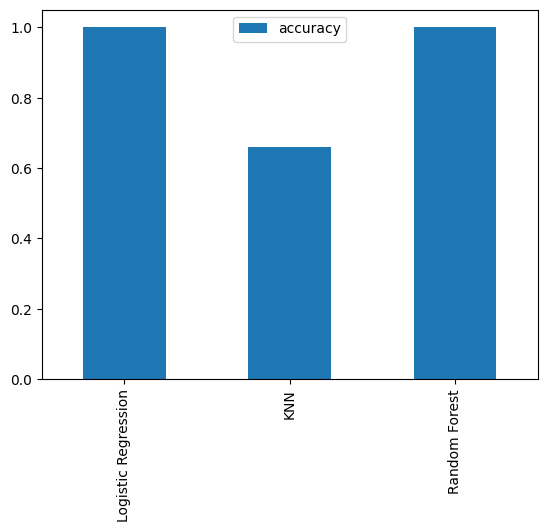

In [62]:
model_compare =pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

## We will be carrying out the following
1. Hyperparameter tuning
2. Feature importance
3. Confusion matric
4. Ceross validation
5. Prescision
6. Recall
7. F1 score
8. Classification report
9. ROc curve
10. AUC

    ## HYPERPARAMETER TUNING BY HAND

In [63]:
# Tuning KNN
train_scores=[]
test_scores=[]
# create a list of n-neighbors
neighbors=range(1,21)
# setup KNN Instance
knn = KNeighborsClassifier()
# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
#fit the algoritm
    knn.fit(x_train,y_train)
#update the train scores list
    train_scores.append(knn.score(x_train, y_train))
 #update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [64]:
train_scores

[1.0,
 0.800561797752809,
 0.8089887640449438,
 0.7387640449438202,
 0.7443820224719101,
 0.7134831460674157,
 0.7176966292134831,
 0.7036516853932584,
 0.7064606741573034,
 0.6924157303370787,
 0.6966292134831461,
 0.6910112359550562,
 0.6980337078651685,
 0.6825842696629213,
 0.6882022471910112,
 0.6811797752808989,
 0.6811797752808989,
 0.6699438202247191,
 0.6699438202247191,
 0.6699438202247191]

In [65]:
test_scores

[0.6312849162011173,
 0.6201117318435754,
 0.6201117318435754,
 0.659217877094972,
 0.659217877094972,
 0.664804469273743,
 0.659217877094972,
 0.659217877094972,
 0.6536312849162011,
 0.6703910614525139,
 0.6927374301675978,
 0.6815642458100558,
 0.6871508379888268,
 0.6759776536312849,
 0.6759776536312849,
 0.6927374301675978,
 0.6871508379888268,
 0.6703910614525139,
 0.6983240223463687,
 0.6815642458100558]

Maximum KNN score on the test data:69.83%


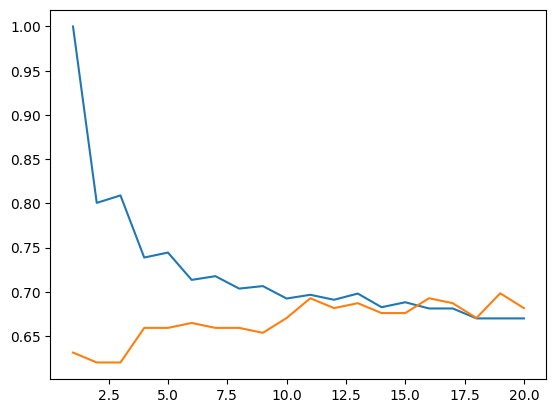

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores, label="Test score")
plt.xlabel=("Model")
plt.ylabel=("Deal")
plt.xticks(rotation=0)
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")
plt.show()

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

# Import all the tools

#Regular EDA and Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

# we want our plot to appear inside the model

#models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve



## HYPERPARAMETER BY RANDOMIZEDCV
we will be tuning logistic regression with RandomizedCv

In [68]:
# Create an hyperparameter grid for logisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver": ["liblinear"]}
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [69]:
# Create an hyperparmeter grid for RandomforestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth": [None, 3, 5,10],
           "min_samples_split":np.arange(1,20,2),
           "min_samples_leaf":np.arange(1,20,2)}
rf_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,0.0,22.0,1,0,A/5 21171,7.2500,-1.0,0.0
1,2,1,1,1.0,1.0,38.0,1,0,PC 17599,71.2833,0.0,1.0
2,3,1,3,2.0,1.0,26.0,0,0,STON/O2. 3101282,7.9250,-1.0,0.0
3,4,1,1,3.0,1.0,35.0,1,0,113803,53.1000,1.0,0.0
4,5,0,3,4.0,0.0,35.0,0,0,373450,8.0500,-1.0,0.0


In [71]:
# Tune logisticRegression
np.random.seed(42)

# Setup random hyperparmeter search for LogisicRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fitting random huperparameter search model for logistic regrssion
rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [72]:
updated_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,float64
Sex,float64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [73]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [74]:
rs_log_reg.score(x_test,y_test)

1.0

 Now we have tuned logistic regression now lets tune
#### RandomForestclassifier

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for search for Randomforestclassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fitting random hyperparameter search model for Rfclassier
error_score='raise'
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [76]:
#find the best parnmeter
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 7,
 'min_samples_leaf': 13,
 'max_depth': 10}

In [77]:
#Evaluate the randomized search Randomforestclassifier model
rs_rf.score(x_test,y_test)

1.0

 Now we have tuned logistic regression and randomforest now lets use gridsearchcv to improve our accuracy
#### GRIDSEARCHCV

In [78]:
# Different  hyperparameters  for our logistic regression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

# Setup grid hyperparameter search for logistic
gs_log_reg= GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [79]:
# Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569415, 'solver': 'liblinear'}

In [80]:
# Evaluate the gridsearch logisticregression model
gs_log_reg.score(x_test,y_test)

1.0

In [81]:
from sklearn.model_selection import RandomizedSearchCV

# Different hyperparameters for our RandomForestClassifier model
rf_grid = {"n_estimators": np.arange(10, 500, 25),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup randomized hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           random_state=42,
                           verbose=True)

# Fit randomized hyperparameter search model
model = rs_rf.fit(x_train, y_train)

# Check the best hyperparameters
print(rs_rf.best_params_)

# Evaluate the randomized search RandomForestClassifier model
print(rs_rf.score(x_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 260, 'min_samples_split': 18, 'min_samples_leaf': 19, 'max_depth': 5}
1.0


In [82]:
import pickle

# Save the model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)


In [83]:
with open("model.pkl", "rb") as file:
    model = pickle.load(file)


In [84]:
# Check the best hyperparameter
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [85]:
# Evaluate the gridsearch logisticregression model
rs_rf.score(x_test,y_test)

1.0

# Evaluating our mahine learning model beyond Accuracy
* ROC Curve and AUC scorce
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-Score
....



   And using cross validation where possible

To make comparisons and evaluate our trained model,we need to make predictions

In [86]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

In [ ]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


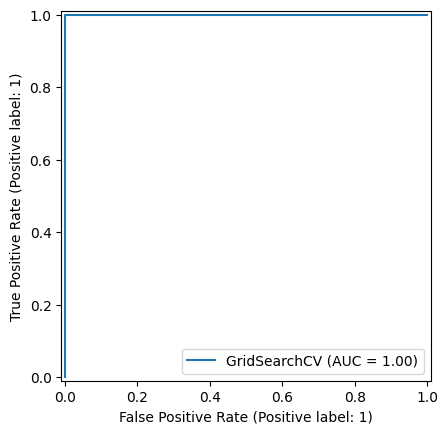

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Plot the ROC curve
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)


In [89]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[105   0]
 [  0  74]]


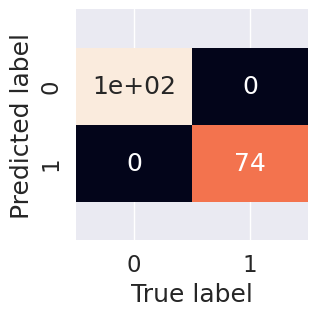

In [ ]:
# Improvng visualization in this condfusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a beautiful confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds), #Fixed typo here
                      annot=True,
                      cbar=False)
    ax.set_xlabel("True label") # Changed plt.xlabel to ax.set_xlabel
    ax.set_ylabel("Predicted label") # Changed plt.ylabel to ax.set_ylabel

    bottom, top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5) #Moved this code inside the function

plot_conf_mat(y_test,y_preds);

We have a Roc curve auc and Confusion matric lets get a classification report as well as cross validated precision recall and f1 score

In [91]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



### Calculate evaluation metrics using cross-validation
we re going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [92]:
# check best hyperparameters
gs_log_reg.best_params_
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [93]:
# Create a new classifer with the best parameters
clf= LogisticRegression(C=0.01, solver="liblinear")

In [94]:
# Cross-validated Accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.90502793, 0.91011236, 0.86516854, 0.8988764 , 0.86516854])

In [95]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8888707551315045

In [96]:
# Cross-validated precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9280195760523628

In [97]:
# Cross-validated recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.7718243819266837

In [98]:
# Cross-validated F1
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8422042048973782

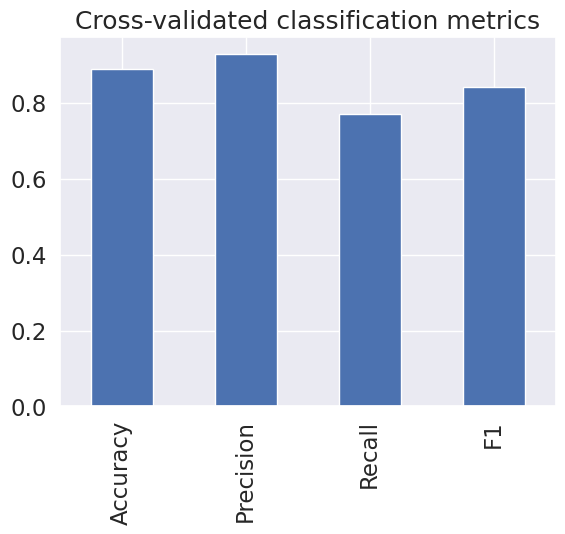

In [ ]:
# Visualising the cross validation metric
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature Importance
Knowing the features that contributed to the outcome mostly.

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,0.0,22.0,1,0,A/5 21171,7.2500,-1.0,0.0
1,2,1,1,1.0,1.0,38.0,1,0,PC 17599,71.2833,0.0,1.0
2,3,1,3,2.0,1.0,26.0,0,0,STON/O2. 3101282,7.9250,-1.0,0.0
3,4,1,1,3.0,1.0,35.0,1,0,113803,53.1000,1.0,0.0
4,5,0,3,4.0,0.0,35.0,0,0,373450,8.0500,-1.0,0.0


In [ ]:
# Fit an instance of logistic regression
clf= LogisticRegression(C=0.01, solver="liblinear").fit(x_train,y_train)
clf

LogisticRegression(C=0.01, solver='liblinear')

In [102]:
clf.coef_

array([[-0.01222303,  1.03636519, -0.21913553,  0.01195929,  0.45124211,
        -0.0234136 , -0.1215304 ,  0.01643628,  0.00558547,  0.00829525,
         0.06371372]])

In [103]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'PassengerId': -0.012223030133056555,
 'Survived': 1.0363651913312193,
 'Pclass': -0.2191355287642072,
 'Name': 0.011959291552707692,
 'Sex': 0.45124211450421936,
 'Age': -0.023413595330718958,
 'SibSp': -0.12153040023495083,
 'Parch': 0.016436281292946185,
 'Ticket': 0.005585470318447336,
 'Fare': 0.008295250888304177,
 'Cabin': 0.06371371936298688}

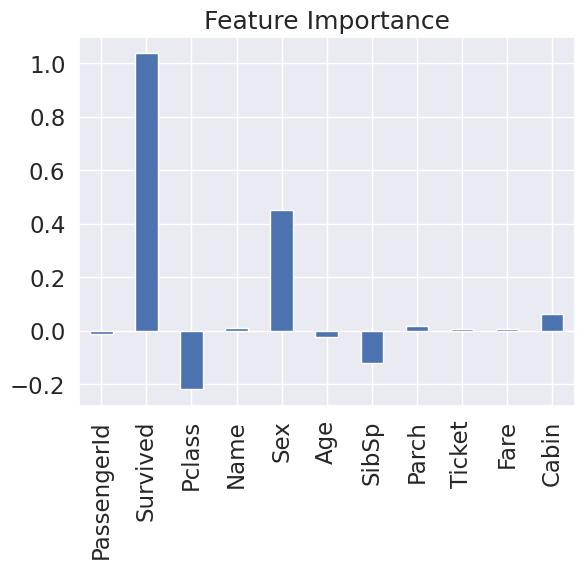

In [ ]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [ ]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
0.0,468,109
1.0,81,233


In [106]:
  predictions = clf.predict(x_test)

In [107]:
  predictions = clf.predict(x_train)

In [ ]:
# Make predictions on the x_test data, not x_train
predictions = clf.predict(x_test)

submission_df = pd.DataFrame({'PassengerId': x_test['PassengerId'], 'Survived': predictions})
submission_df

,PassengerId,Survived
709,710,0
439,440,0
840,841,0
720,721,1
39,40,1
...,...,...
433,434,0
773,774,0
25,26,1
84,85,1


In [109]:
pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.3 MB/s eta 0:00:00


In [110]:
pip install Flask

In [111]:
import pandas as pd

# Assuming these are the feature names used during training
feature_names = ["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin","Embarked"]

# Example input data matching the training feature names
sample_input = [1, 0, 3, 22, 1, 0, 7.25, 0, 1, 0, 1]  # Example values

# Convert input data to a DataFrame with correct feature names
sample_input_df = pd.DataFrame([sample_input], columns=feature_names)

# Prediction function
def make_prediction(input_data_df):
    # Ensure input is a DataFrame with the correct columns
    prediction = model.predict(input_data_df)
    return prediction

# Test the function
print("Prediction:", make_prediction(sample_input_df))


Prediction: [0]


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Define sliders for each feature
age_slider = widgets.IntSlider(value=22, min=0, max=80, description="Age")
pclass_slider = widgets.IntSlider(value=3, min=1, max=3, description="Pclass")
# Add more widgets for each feature...

# Button to make prediction
button = widgets.Button(description="Make Prediction")

# Function to handle button click and make prediction
def on_button_clicked(b):
    sample_input = [pclass_slider.value, 0, age_slider.value, 1, 0, 7.25, 0, 1, 0, 1]
    df_input = pd.DataFrame([sample_input], columns=feature_names)
    prediction = model.predict(df_input)
    print("Prediction:", prediction)

# Connect button to function
button.on_click(on_button_clicked)

# Display the widgets
display(pclass_slider, age_slider, button)


IntSlider(value=3, description='Pclass', max=3, min=1)

IntSlider(value=22, description='Age', max=80)

Button(description='Make Prediction', style=ButtonStyle())

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Define input widgets for the Titanic features
pclass_slider = widgets.IntSlider(value=3, min=1, max=3, description='Pclass')
age_slider = widgets.IntSlider(value=22, min=0, max=80, description='Age')
sibsp_slider = widgets.IntSlider(value=0, min=0, max=10, description='SibSp')
parch_slider = widgets.IntSlider(value=0, min=0, max=10, description='Parch')
fare_slider = widgets.FloatSlider(value=7.25, min=0, max=500, step=0.01, description='Fare')
# Add additional sliders for any other features if needed

# Button for prediction
button = widgets.Button(description='Make Prediction')

# Define the function that will make the prediction
def on_button_clicked(b):
    # Collect feature values from the widgets
    sample_input = {
        'Pclass': [pclass_slider.value],
        'Age': [age_slider.value],
        'SibSp': [sibsp_slider.value],
        'Parch': [parch_slider.value],
        'Fare': [fare_slider.value],
        # Add any additional fields needed for your model
    }

    # Create DataFrame from input features
    df_input = pd.DataFrame(sample_input)

    # Make prediction
    prediction = model.predict(df_input)
    print("Prediction:", prediction)

# Connect button to prediction function
button.on_click(on_button_clicked)

# Display the widgets
display(pclass_slider, age_slider, sibsp_slider, parch_slider, fare_slider, button)


IntSlider(value=3, description='Pclass', max=3, min=1)

IntSlider(value=22, description='Age', max=80)

IntSlider(value=0, description='SibSp', max=10)

IntSlider(value=0, description='Parch', max=10)

FloatSlider(value=7.25, description='Fare', max=500.0, step=0.01)

Button(description='Make Prediction', style=ButtonStyle())

In [117]:
print(f"helloworld:", predictions)

helloworld: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


In [118]:
!pip install streamlit pyngrok scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [131]:
with open("app.py", "w") as file:
    file.write("""
import streamlit as st
import pickle
import numpy as np
import pandas as pd

# Load the trained model from model.pkl
with open("model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Define the input fields for prediction
st.title("Titanic Survival Prediction")

# Input fields for user to enter data
pclass = st.selectbox("Pclass", [1, 2, 3])
age = st.slider("Age", 0, 100, 22)
sibsp = st.slider("SibSp (Number of Siblings/Spouses aboard)", 0, 10, 0)
parch = st.slider("Parch (Number of Parents/Children aboard)", 0, 10, 0)
fare = st.slider("Fare", 0.0, 500.0, 10.0)
embarked = st.selectbox("Embarked", ['C', 'Q', 'S'])

# Convert categorical variables to numeric
embarked_map = {'C': 0, 'Q': 1, 'S': 2}
embarked = embarked_map[embarked]

# Prepare the input data for prediction
input_data = np.array([[pclass, age, sibsp, parch, fare, embarked]])

# Prediction button
if st.button("Make Prediction"):
    prediction = model.predict(input_data)

    if prediction[0] == 0:
        st.write("The passenger did not survive.")
    else:
        st.write("The passenger survived.")
    """)


In [132]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.78.128:8501

  Stopping...
^C


In [125]:
import os
os.listdir()


['.config', 'train (1).csv', 'model.pkl', 'sample_data']